<a href="https://colab.research.google.com/github/maggiecrowner/labs_fork/blob/main/02WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##02: Web Scraping Lab - Maggie Crowner

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/cla#search=1~gallery~0~0'
raw = requests.get(url,headers=header)

In [5]:
from bs4 import BeautifulSoup as soup
bsObj = soup(raw.content,'html.parser')
listings = bsObj.find_all(class_="cl-static-search-result")

In [19]:
num_sizes = ['1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5', '5.5', '6',
         '6.5', '7', '7.5', '8', '8.5',
         '9', '9.5', '10', '10.5', '11', '11.5', '12', '12.5', '13', '13.5',
         '14', '14.5', '15', '15.5', '16', '16.5', '17', '17.5', '18',
         '18.5', '19', '19.5', '20']
char_sizes = ['xxs', 'xs', 's', 'm', 'l', 'xl', 'xxl', '3xl', '4xl', '5xl']
types = ['shoes', 'shirt', 'boots', 'sneakers', 'pants', 'jeans', 'coat',
         'jacket', 'purse', 't-shirt', 'dress', 'gown', 'sandals',
         'belt', 'top', 'skirt', 'bag', 'jumpsuit', 'sweatshirt', 'sweater',
         'shoes,', 'shirt,', 'boots,', 'sneakers,', 'pants,', 'jeans,', 'coat,',
         'jacket,', 'purse,', 't-shirt,', 'dress,', 'gown,', 'sandals,',
         'belt,', 'top,', 'skirt,', 'bag,', 'jumpsuit,', 'sweatshirt,', 'sweater,']

data = []
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    link = listings[k].find(href=True)['href']
    # Get numerical size from the title string:
    words = title.split()
    hits = [word for word in words if word in num_sizes]
    if len(hits) == 0:
        num_size = 'missing'
    else:
        num_size = hits[0]
    # Get character size from the title string:
    words = title.split()
    hits = [word for word in words if word.lower() in char_sizes]
    if len(hits) == 0:
        char_size = 'missing'
    else:
        char_size = hits[0]
    # Get type from the title string:
    words = title.split()
    hits = [word for word in words if word.lower() in types]
    if len(hits) == 0:
        clothing_type = 'missing'
    else:
        clothing_type = hits[0]
    # New clothing, or like new:
    words = title.split()
    hits = [word for word in words if word.lower() == 'new']
    if len(hits) == 0:
        is_new = 'not new'
    else:
        is_new = hits[0]
    data.append({'title':title,'price':price,'num_size':num_size,'link':link,'char_size':char_size, 'type': clothing_type, 'is_new': is_new})

In [20]:
df = pd.DataFrame.from_dict(data)

Wrangling

In [21]:
df['price'] = df['price'].str.replace('$','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['num_size'] = pd.to_numeric(df['num_size'],errors='coerce')
df['type'] = df['type'].str.replace(',','')
df.to_csv('craigslist_cville_clothes.csv')
df.head()

,title,price,num_size,link,char_size,type,is_new
0,easy rider leather motorcycle boots,40.0,NaN,https://charlottesville.craigslist.org/clo/d/c...,missing,boots,not new
1,columbia men's winter boots - new,75.0,NaN,https://charlottesville.craigslist.org/clo/d/c...,missing,boots,new
2,"formal leather jacket, mens 3xl, like new",35.0,NaN,https://charlottesville.craigslist.org/clo/d/c...,missing,jacket,new
3,"leatherman usa 5xl coat, like new",60.0,NaN,https://charlottesville.craigslist.org/clo/d/c...,5xl,coat,new
4,"xxl aberdeen collection leather coat, like new",60.0,NaN,https://charlottesville.craigslist.org/clo/d/c...,xxl,coat,new


EDA

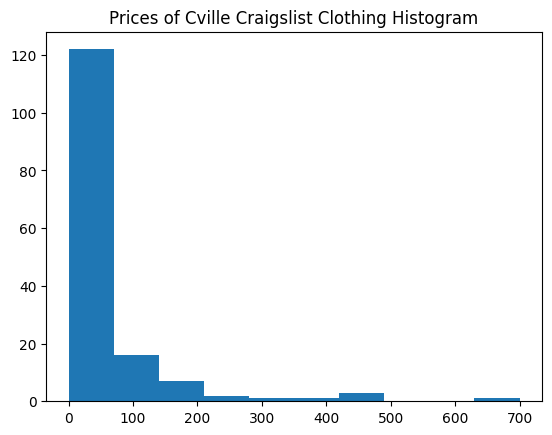

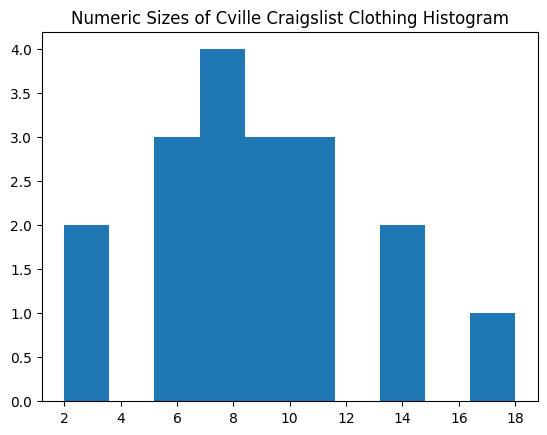

In [24]:
df['price'].hist(grid=False)
plt.title('Prices of Cville Craigslist Clothing Histogram')
plt.show()

df['num_size'].hist(grid=False)
plt.title('Numeric Sizes of Cville Craigslist Clothing Histogram')
plt.show()

In [25]:
df.loc[:,['price','type']].groupby('type').describe()

price                                                            
           count        mean         std   min     25%    50%     75%    max
type                                                                        
bag          2.0   72.500000   74.246212  20.0   46.25   72.5   98.75  125.0
belt         2.0    7.500000    3.535534   5.0    6.25    7.5    8.75   10.0
boots       11.0   63.181818   43.094821  12.0   30.00   60.0   87.50  150.0
coat         9.0  167.222222  222.009447  20.0   30.00   60.0  160.00  700.0
dress        6.0   77.000000   92.617493   0.0   11.75   31.0  157.50  195.0
gown         2.0  212.500000  300.520382   0.0  106.25  212.5  318.75  425.0
jacket      13.0   68.769231  111.589392   0.0   25.00   35.0   60.00  425.0
jeans       11.0   51.363636   45.996245   0.0    8.00   60.0   80.00  140.0
jumpsuit     2.0   56.500000   47.376154  23.0   39.75   56.5   73.25   90.0
missing     55.0   48.400000   77.476066   0.0   12.50   24.0   47.00  450.0
pants        5.0   20.000000    7.905694  10.0   15.00   20.0   25.00   30.0
purse        1.0   50.000000         NaN  50.0   50.00   50.0   50.00   50.0
sandals      2.0   17.000000   16.970563   5.0   11.00   17.0   23.00   29.0
shirt        2.0   28.500000   16.263456  17.0   22.75   28.5   34.25   40.0
shoes       15.0   47.866667   86.657674   0.0   10.00   20.0   44.50  350.0
skirt        2.0    8.000000    0.000000   8.0    8.00    8.0    8.00    8.0
sneakers     2.0   50.000000   14.142136  40.0   45.00   50.0   55.00   60.0
sweater      1.0   10.000000         NaN  10.0   10.00   10.0   10.00   10.0
sweatshirt   3.0   25.666667   16.772994  15.0   16.00   17.0   31.00   45.0
t-shirt      1.0    0.000000         NaN   0.0    0.00    0.0    0.00    0.0
top          6.0   15.000000    5.477226   5.0   15.00   15.0   18.75   20.0

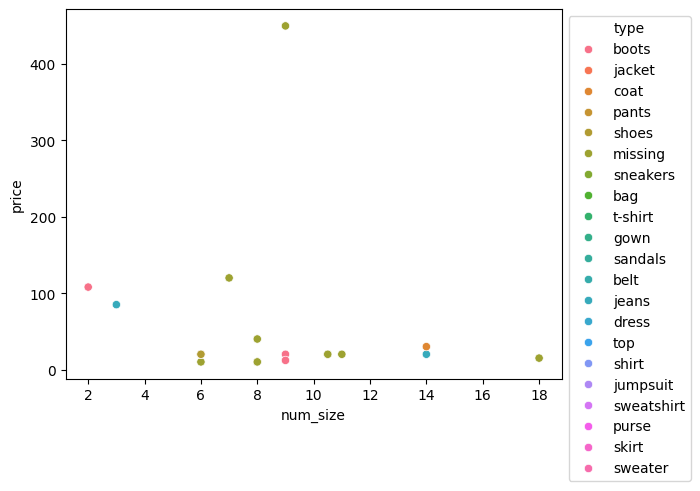

In [27]:
ax = sns.scatterplot(data=df, x='num_size', y='price',hue='type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

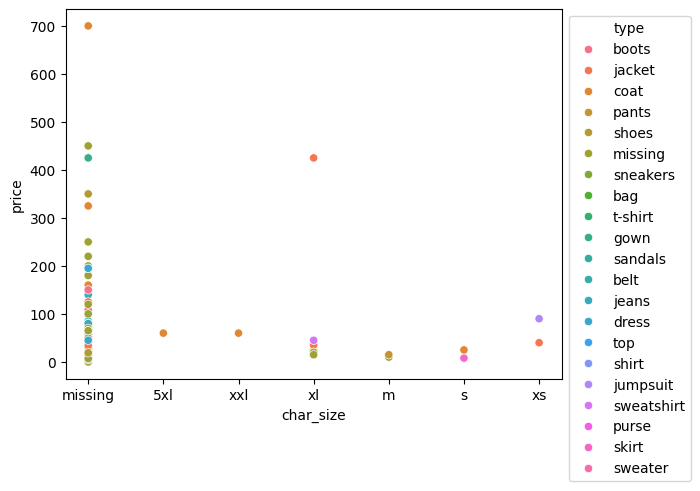

In [28]:
ax = sns.scatterplot(data=df, x='char_size', y='price',hue='type')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

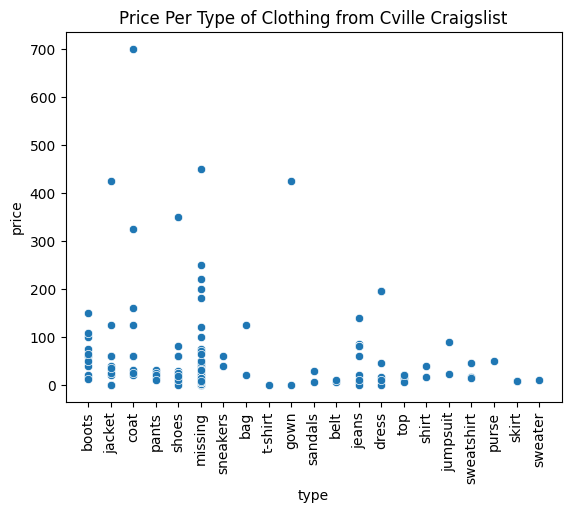

In [35]:
sns.scatterplot(data=df, x='type', y='price')
plt.title('Price Per Type of Clothing from Cville Craigslist')
plt.xticks(rotation=90)
plt.show()